In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_boston

raw_data = load_boston()
print(raw_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
df = pd.DataFrame(raw_data.data, columns=raw_data.feature_names)
df["PRICE"] = raw_data.target
display(df)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# Binning & Smooting

Data içinde bulunan "DIS" değişkeninde Evin Bostondaki iş merkezlerine uzaklığı ağırlıklı olarak hesaplanmış. Bu değişkeni farklı yöntemler kullanarak Ayrıklaştırmak istiyoruz.  

[]

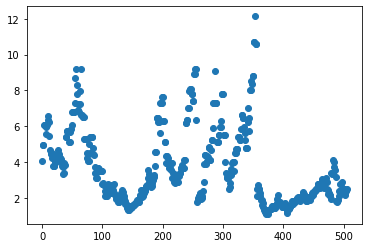

In [4]:
# Bu scatterplotı Ayrıklaştırma işlemi yapıldıktan sonraki hali ile karşılaştırabilirsiniz
DIS = df.DIS
x = np.arange(len(DIS))
plt.scatter(x, DIS)
plt.plot()

### Soru

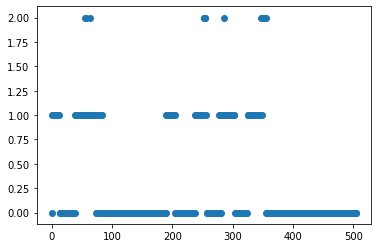

In [5]:
new_DIS, bins = pd.cut(df.DIS, bins=3, retbins=True, labels=[0,1,2])

# y değişkeninin için pd.cut fonksiyonunu kullanarak df.DIS 'ın ayrıklaştırılmış hali ile doldurun 
                # NOT: bins parametresi için "3", labels için "[0,1,2]" ve retbins için "True" değerlerini kullanın

x = np.arange(len(new_DIS))
plt.scatter(x, new_DIS)

<b>pd.cut</b> fonksiyonu, değişkeni ayrıklaştırırken aşağıdaki stratejilerden hangisini kullandı?<br>
-- Equal-frequency(Eşit frekans)<br>
-- Equal-width (eşit aralıklar)

IPUCU: değişkenin min-max değerlerini ve value_count dağılımlarını kontrol edebilirsiniz.

In [6]:
print("Min:", df.DIS.min(),"Max:", df.DIS.max())
print("Sınır değerleri:", bins)
print("\n Ayrık değerlerin görülme sayısı")
print(new_DIS.value_counts(), "\n\n")

print("pd.cut fonksiyonu, değişkeni ayrıklaştırırken Equal-frequency(Eşit frekans) stratejisini kullandı")

Min: 1.1296 Max: 12.1265
Sınır değerleri: [ 1.1186031   4.79523333  8.46086667 12.1265    ]

 Ayrık değerlerin görülme sayısı
0    365
1    125
2     16
Name: DIS, dtype: int64 


pd.cut fonksiyonu, değişkeni ayrıklaştırırken Equal-frequency(Eşit frekans) stratejisini kullandı


### Soru 

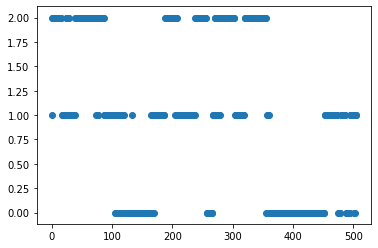

In [7]:
new_DIS, bins = pd.qcut(df.DIS, q=3, retbins=True, labels=[0,1,2])

# aynı işlemi pd.qcut kullanarak yapın
                # NOT: q parametresi için "3", labels için "[0,1,2]" ve retbins için "True" değerlerini kullanın
x = np.arange(len(new_DIS))
plt.scatter(x, new_DIS)

<b>pd.qcut</b> fonksiyonu, değişkeni ayrıklaştırırken aşağıdaki stratejilerden hangisini kullandı?<br>
-- Equal-frequency(Eşit frekans)<br>
-- Equal-width (eşit aralıklar)

IPUCU: değişkenin min-max değerlerini ve value_count dağılımlarını kontrol edebilirsiniz.

In [8]:
print("Min:", df.DIS.min(),"Max:", df.DIS.max())
print("Sınır değerleri:", bins)
print("\n Ayrık değerlerin görülme sayısı")
print(new_DIS.value_counts(), "\n\n")

print("pd.qcut fonksiyonu, değişkeni ayrıklaştırırken Equal-width(Eşit aralıklar) stratejisini kullandı")

Min: 1.1296 Max: 12.1265
Sınır değerleri: [ 1.1296      2.38403333  4.3257     12.1265    ]

 Ayrık değerlerin görülme sayısı
2    169
0    169
1    168
Name: DIS, dtype: int64 


pd.qcut fonksiyonu, değişkeni ayrıklaştırırken Equal-width(Eşit aralıklar) stratejisini kullandı


# Feature Generation

Bu bölümde var olan değişkenlerden yeni değişkenler üretelim.

In [9]:
df["Age_Nox_Top"] = df.AGE+df.NOX
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,Age_Nox_Top
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,65.738
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,79.369
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,61.569
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,46.258
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,54.658


In [10]:
df["Age_Nox_Fark"] = df.AGE-df.NOX

In [11]:
df["Age_Nox_Bolum"] = df.AGE/df.NOX
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,Age_Nox_Top,Age_Nox_Fark,Age_Nox_Bolum
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,65.738,64.662,121.189591
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,79.369,78.431,168.230277
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,61.569,60.631,130.277186
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,46.258,45.342,100.000000
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,54.658,53.742,118.340611


In [12]:
df["Age_Nox_Carp"] = df.AGE*df.NOX
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,Age_Nox_Top,Age_Nox_Fark,Age_Nox_Bolum,Age_Nox_Carp
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,65.738,64.662,121.189591,35.0776
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,79.369,78.431,168.230277,37.0041
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,61.569,60.631,130.277186,28.6559
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,46.258,45.342,100.000000,20.9764
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,54.658,53.742,118.340611,24.8236


sklearn kütüphanesindeki PolynomialFeatures'ı kullanarak yeni featurelar üretin (NOT:Hedef değişkeni(PRICE) yeni featureları üretirken kullanmayın.)

In [13]:
X=df.loc[:, df.columns != 'PRICE']
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Age_Nox_Top,Age_Nox_Fark,Age_Nox_Bolum,Age_Nox_Carp
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,65.738,64.662,121.189591,35.0776
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,79.369,78.431,168.230277,37.0041
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,61.569,60.631,130.277186,28.6559
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,46.258,45.342,100.000000,20.9764
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,54.658,53.742,118.340611,24.8236


In [14]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, interaction_only=False)
X_poly=pd.DataFrame(poly.fit_transform(X))
X_poly.head()

,0,1,2,3,4,5,6,7,8,9,...,1130,1131,1132,1133,1134,1135,1136,1137,1138,1139
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,...,270363.088966,5.067148e+05,146665.557661,9.496854e+05,274880.74848,79562.583363,1.779901e+06,5.151818e+05,149116.280704,43160.812752
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,...,482462.160137,1.034855e+06,227627.825986,2.219709e+06,488249.44551,107395.836284,4.761157e+06,1.047269e+06,230358.293361,50669.840566
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,...,222886.720220,4.789143e+05,105342.474410,1.029038e+06,226348.25551,49787.788630,2.211083e+06,4.863521e+05,106978.492439,23531.096175
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,...,93218.480142,2.055897e+05,43125.317076,4.534200e+05,95111.19288,19950.904263,1.000000e+06,2.097640e+05,44000.935696,9229.812275
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,...,155217.782194,3.417917e+05,71695.585168,7.526299e+05,157874.64888,33116.417848,1.657301e+06,3.476421e+05,72922.800304,15296.578283


# Normalizasyon

sklearn kütüphanesindeki Min-max scalerı kullanarak datayı normalize edip yeni bir dataframe içine atayın 

In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
min_max = MinMaxScaler(feature_range=(0,1))
min_max.fit(df)
norm_data = pd.DataFrame(min_max.transform(df), index=df.index, columns=df.columns)
display(norm_data)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,Age_Nox_Top,Age_Nox_Fark,Age_Nox_Bolum,Age_Nox_Carp
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222,0.639747,0.640950,0.556201,0.393684
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889,0.779519,0.782813,0.784277,0.416137
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000,0.596998,0.599419,0.600262,0.318840
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111,0.439999,0.441896,0.453463,0.229336
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333,0.526132,0.528441,0.542387,0.274175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095,0.386667,0.680096,0.680771,0.553310,0.446326
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815,0.346667,0.758026,0.759074,0.617618,0.497080
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892,0.420000,0.904658,0.906407,0.738618,0.592580
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071,0.377778,0.887227,0.888892,0.724234,0.581227


sklearn kütüphanesindeki StandardScalerı kullanarak datayı standardize edip yeni bir dataframe içine atayın 

In [16]:
std_scaler =StandardScaler()
std_scaler.fit(df)
std_data_1= pd.DataFrame(std_scaler.transform(df), index=df.index, columns=df.columns)
display(std_data_1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,Age_Nox_Top,Age_Nox_Fark,Age_Nox_Bolum,Age_Nox_Carp
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686,-0.120245,-0.119780,0.013438,-0.245659
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524,0.363024,0.371330,1.149675,-0.157062
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247,-0.268051,-0.263557,0.232943,-0.540982
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758,-0.810882,-0.808882,-0.498382,-0.894148
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503,-0.513071,-0.509273,-0.055377,-0.717222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147,-0.014454,0.019266,0.018076,-0.000963,-0.037944
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850,-0.210362,0.288714,0.289152,0.319409,0.162326
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048,0.148802,0.795701,0.799202,0.922213,0.539149
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302,-0.057989,0.735430,0.738566,0.850551,0.494352


sklearn kütüphanesindeki RobustScalerı kullanarak datayı standardize edip yeni bir dataframe içine atayın 

In [17]:
robust_scaler =RobustScaler()
robust_scaler.fit(df)
std_data_2= pd.DataFrame(robust_scaler.transform(df), index=df.index, columns=df.columns)
display(std_data_2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,Age_Nox_Top,Age_Nox_Fark,Age_Nox_Bolum,Age_Nox_Carp
0,-0.069593,1.44,-0.571650,0.0,0.000000,0.496612,-0.250765,0.285777,-0.20,-0.087855,-1.339286,0.261902,-0.637681,0.351097,-0.248942,-0.252352,-0.119156,-0.165121
1,-0.063755,0.00,-0.202943,0.0,-0.394286,0.287940,0.028542,0.569789,-0.15,-0.227390,-0.446429,0.261902,-0.221889,0.050157,0.028121,0.029921,0.692534,-0.115799
2,-0.063760,0.00,-0.202943,0.0,-0.394286,1.323171,-0.334353,0.569789,-0.15,-0.227390,-0.446429,0.066675,-0.732634,1.692790,-0.333681,-0.334990,0.037651,-0.329527
3,-0.062347,0.00,-0.581720,0.0,-0.457143,1.069783,-0.646279,0.924391,-0.10,-0.279070,-0.125000,0.153016,-0.841579,1.529781,-0.644891,-0.648425,-0.484783,-0.526135
4,-0.052144,0.00,-0.581720,0.0,-0.457143,1.271680,-0.475025,0.924391,-0.10,-0.279070,-0.125000,0.261902,-0.602699,1.880878,-0.474153,-0.476219,-0.168315,-0.427640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.053930,0.00,0.173509,0.0,0.200000,0.521003,-0.171254,-0.236007,-0.20,-0.147287,0.696429,0.026382,-0.168916,0.150470,-0.168959,-0.173118,-0.129444,-0.049485
502,-0.058759,0.00,0.173509,0.0,0.200000,-0.119919,-0.016310,-0.297887,-0.20,-0.147287,0.696429,0.261902,-0.227886,-0.075235,-0.014482,-0.017313,0.099419,0.062005
503,-0.054450,0.00,0.173509,0.0,0.200000,1.039973,0.275229,-0.336744,-0.20,-0.147287,0.696429,0.261902,-0.571714,0.338558,0.276179,0.275846,0.530043,0.271782
504,-0.040867,0.00,0.173509,0.0,0.200000,0.793360,0.240571,-0.265053,-0.20,-0.147287,0.696429,0.096414,-0.487756,0.100313,0.241624,0.240995,0.478850,0.246844


# Correlation & Covariance

Bu hücrede değişkenlerin birbiri ile olan korelasyonları heatmap kullanarak görselleştirildi.<br>
Aşağıdaki sorular bu görseli incelemeye ve yorumlamaya yönelik olacaktır.


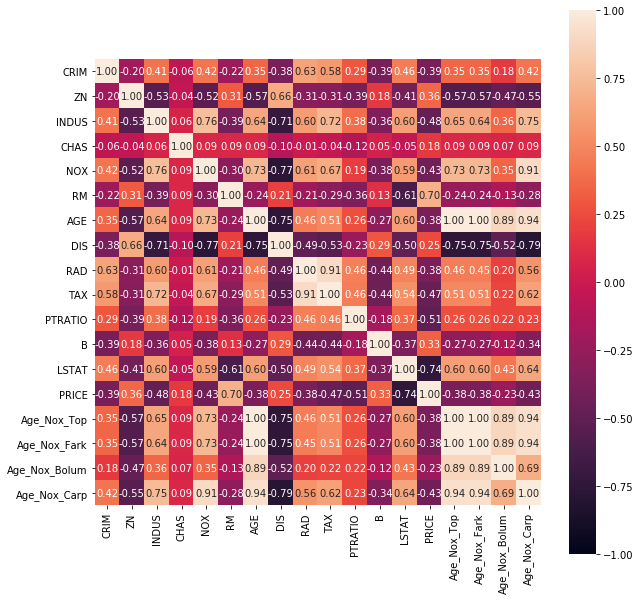

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, square=True, annot=True, fmt='.2f')
plt.show()

Aşağıda örnek iki değişken için scatter plot çizilmiştir.

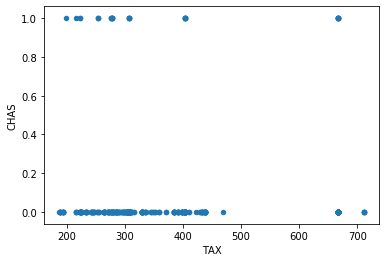

In [19]:
df.plot.scatter("TAX","CHAS")
plt.show()
# scatter plot çizerken buradan kopya çekebilirsiniz :)

Yukarıdaki heatmapten birbiri ile pozitif yüksek korelasyona sahip iki değişken için scatter plot çiziniz. Bir iki cümle ile görseli yorumlamaya çalışınız. Not:Yorum yaparken değişkenlerin yukarıdaki açıklamalarından faydalanabilirsiniz.

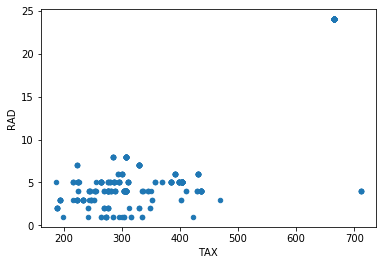

Değer 1'e yakınsa çok güçlü pozitif korelasyon yani biri yükselirken diğeri de yükselme eğiliminde olduğu söylenebilir.Tax ve Rad değeleri arasında 0.91 oranında pozitif yüksek korelasyon vardır


In [20]:
df.plot.scatter("TAX","RAD")
plt.show()

print("Değer 1'e yakınsa çok güçlü pozitif korelasyon yani biri yükselirken diğeri de yükselme eğiliminde olduğu söylenebilir.Tax ve Rad değeleri arasında 0.91 oranında pozitif yüksek korelasyon vardır")

Heatmapten faydalanarak negatif korelasyonlu iki değişken için scatter plot çiziniz. Sonucu yorumlayınız

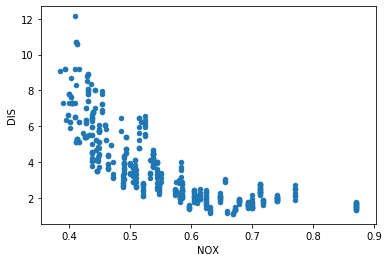

Bu iki değişken arasında -0.77 oranında negatif korelasyon vardır. -1' e yaklaşan değerler için yüksek negatif korelasyon yani biri yukarı çıkarken diğerini aşağı itme eğiliminde olan veya tam tersi durumda olan iki değişkenden bahsedilebilir.


In [21]:
df.plot.scatter("NOX","DIS")
plt.show()

print("Bu iki değişken arasında -0.77 oranında negatif korelasyon vardır. -1' e yaklaşan değerler için yüksek negatif korelasyon yani biri yukarı çıkarken diğerini aşağı itme eğiliminde olan veya tam tersi durumda olan iki değişkenden bahsedilebilir.")

Heatmapten faydalanarak düşük korelasyonlu iki değişken için scatter plot çiziniz. Sonucu yorumlayınız.

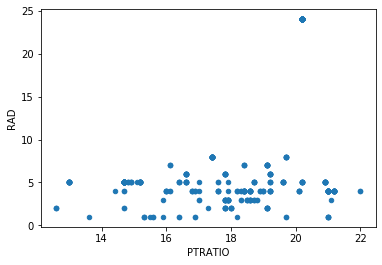

Bu iki değişken arasında 0.46 oranında pozitif düşük korelasyon vardır. 


In [22]:
df.plot.scatter("PTRATIO","RAD")
plt.show()
print("Bu iki değişken arasında 0.46 oranında pozitif düşük korelasyon vardır. ")

### Soru

<b>Adım 1 :</b> df.cov() methodunu kullanarak datasetteki covariance değerlerini hesaplayın.<br> 
sns.heatmap ile bu methodu görselleştirin (IPUCU: Yukarıda korelasyon gösteriminde kullanılan yöntemin aynısı)
heatmap için vmin ve vmax parametrelerini kullanmayın.

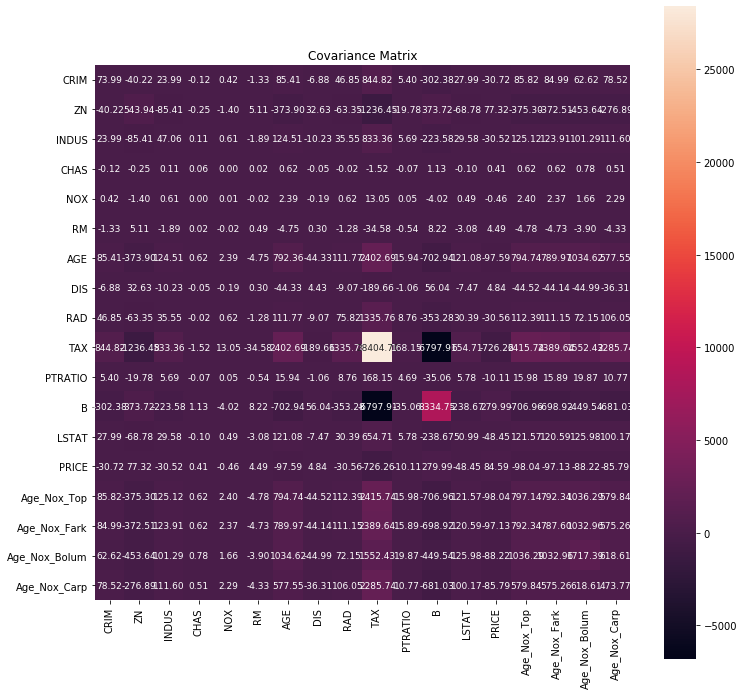

In [23]:
plt.figure(figsize=(12,12))
sns.heatmap(df.cov(), annot=True, square=True,fmt='.2f',annot_kws={"size": 9})
plt.title('Covariance Matrix')
plt.show()


<b>Adım 2 :</b> Şimdi sklearn.preprocessing paketi içindeki StandardScaler objesini kullanarak datayı standardize edin ve bunu ayrı bir dataframede tutun. Standardize edilmiş dataframe objesinin Kovaryans değerini tekrar hesaplatıp görselleştirin.

<br>IPUCU : standardScalerdan gelen dönüştürülmüş datayı tekrar pandas DataFrame objesine çevirin ve bunu yaparken kolon adlarını kaybetmemeye çalışın örn: pd.DataFrame(standardize_numpy_datası, columns=df.columns)

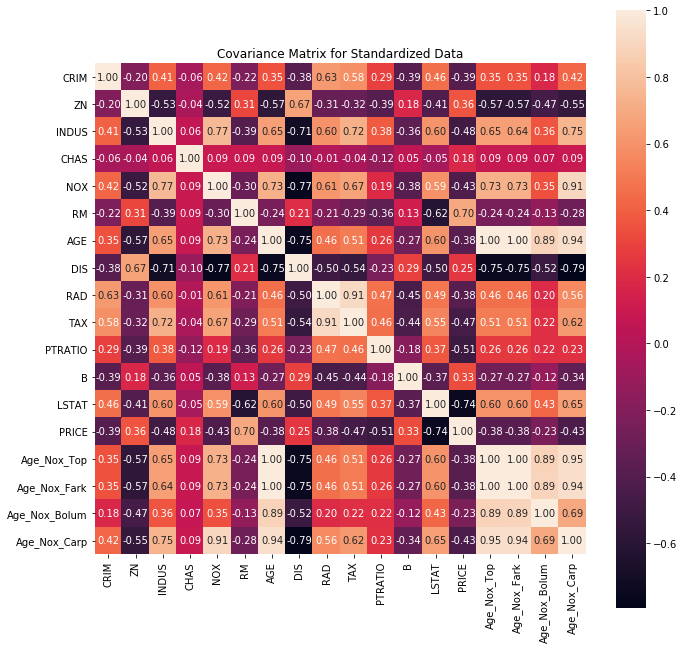

In [24]:
std_scaler.fit(df)
data_new= pd.DataFrame(std_scaler.transform(df), index=df.index, columns=df.columns)
plt.figure(figsize=(11,11))
sns.heatmap(data_new.cov(), annot=True, square=True,fmt='.2f',annot_kws={"size": 10})
plt.title('Covariance Matrix for Standardized Data')
plt.show()